In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Support Vector Machines (SVM)

## Intro

This method has an extremely elegant and robust construction, which, although complex, can be understood in simple geometric terms. In this class, we will explore the main aspects of this construction, in a higher-level presentation, without worrying too much about the mathematical details.

One very important point about SVMs, which is what actually gives them such high power, is their **ability to produce a simple hypothesis, from a complex set of hypotheses**, which has direct consequences on the **generalization capacity** of SVM models: they are able to generalize very well, despite the hypotheses produced seeming highly complex, which is quite formidable.

We will not go into the mathematical details that justify and prove the points above. But, for those interested, almost every machine learning textbook addresses these issues. I recommend, in particular, [this book](https://www.google.com.br/books/edition/Learning_with_Kernels/7r34DwAAQBAJ?hl=pt-BR&gbpv=1&dq=learning+with+kernels&printsec=frontcover), which extensively details SVM and related methods; or [this book](https://cs.nyu.edu/~mohri/mlbook/), which formally addresses learning theory, eventually culminating in the huge success of SVMs. Finally, I also recommend [this course](https://work.caltech.edu/index.html) from Caltech, where the topics covered in Mohri's book are presented in a clear, direct, and very illustrative way. This is my biggest recommendation for those who are interested in starting their studies in statistical learning theory, and then having all the rigorous foundation to understand why SVMs are so interesting.

Now, let's start our exposition, introducing a fundamental concept for SVMs: the **margin**, and the so-called **margin classifiers**.

## Margin classifiers

Consider the following supervised dataset of a binary classification problem:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

It is visible that the data is linearly separable. In fact, there are infinitely many possible lines that perfectly separate the two classes. Some examples:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Let's look separately at each of these three models:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Despite both perfectly separating the training data (training error is zero), we can ask ourselves: which of them has the potential to present **better generalization?**

To reflect on this, consider that we want to classify the test point indicated in black:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

It is very reasonable that this point is classified as being of the red class, isn't it? However, the first classifier will classify it as belonging to the blue class.

Why does this happen? Intuitively, we can say that the decision boundary of the first model is "**very close**" to the points of the red class, right?

But, if we are evaluating the **decision boundary**, it is reasonable that we care, in fact, about the proximity between it **and the "outermost points"** of the respective class, right? After all, intuitively, these are the points that exert the greatest influence on the decision boundary, right?

It is here that the concept of **margin** comes in:

> **Margin** is the **smallest distance** between the training points and the decision boundary

Below, we visualize the margins associated with each of the three models:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

Given the definition of margin, it is clear that the third model would be our best option, as it **presents a larger margin**. In fact, intuitively, a classifier that presents a larger margin will have a better chance of generalization.

> **Maximum margin classifier** is a **linear** classifier that is constructed so that the margin is maximized.

### Smooth margin classifier

A smooth margin classifier is obtained with an extremely simple modification with respect to the maximum margin classifier: allowing **classification errors** to be made in the training set. A possible solution would be something like this:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

In this case, we have two incorrect observations within the margin - and that's fine, because given that these observations are outliers, we don't need to worry about adjusting the margin to them. With that, we have a model with a slightly larger bias, but with much lower variance - we walk in the direction of the **sweet spot** of generalization.

Note, therefore, that the introduction of a smooth margin can be seen as **a regularization procedure** applied to the margin classifier. And that's exactly how we'll see this procedure when we get to SVM - a regularization procedure.

A smooth margin classifier is also called a **support vector classifier**, and the points that "support" the margin are precisely the so-called **support vectors**.

#### $D=1$

If we have a single feature $(X)$, we will have a **0-dimensional hyperplane**, which is nothing more than **a point** as a decision boundary:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

#### $D=2$

If we have two features $(X_1, X_2)$, we will have a **1-dimensional hyperplane**, which is nothing more than **a line** as a decision boundary:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

#### $D=3$

If we have three features $(X_1, X_2, X_3)$, we will have a **2-dimensional hyperplane**, which is nothing more than **a plane** as a decision boundary:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

For higher dimensions, $D > 3$, we can no longer visualize the decision boundary, but, in any way, it will be linear (hence, a hyper**plane**).

## SVM

Imagine that we have the following dataset (with a single dimension):

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/e00c77e0-14fb-472f-b9ae-f6af7b229ad5.PNG width=400>

It is quite evident that this dataset **is not linearly separable**. Therefore, we cannot produce a support vector classifier for this dataset **in the original feature space**. But, then comes a very interesting idea: what if we **take the data to one or another space?** It would be possible that in the original space the data is not linearly separable, but **it is** in some other space?

A priori, if we introduce a new feature $X_2 = X_1^2$, we will be transforming our dataset such as **each observation will be characterized by two features instead of a single one**. That is, our feature space effectively changes from $\mathbb{R}^1$ to $\mathbb{R}^2$.

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/8d5e6199-8a33-45cf-9e4f-c6507024fb36.PNG width=800>

The performed procedure is called **feature map**, and it is mathematically represented by the map (function) $\Phi$. This is exactly the same procedure that we perform when we use the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

The "original space" is commonly called the **input space** (we will represent it by $\mathcal{X}$); while the space after applying the feature map is called the **feature space (we will represent it by $\mathcal{Z}$)**

<img src=https://miro.medium.com/max/872/1*zWzeMGyCc7KvGD9X8lwlnQ.png width=400>

In [2]:
np.random.seed(42)

data = {"x_1": np.random.normal(0, 1, 20)}
df = pd.DataFrame(data)
df["y"] = df["x_1"].apply(lambda x: 1 if abs(x) > 1.1 else 0)
df.head()

,x_1,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,1
4,-0.234153,0


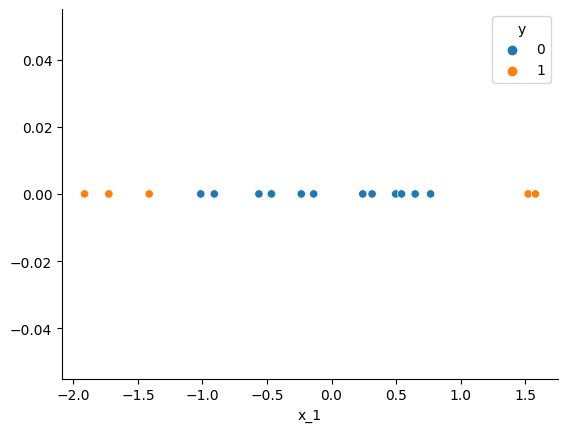

In [3]:
sns.scatterplot(data=df, x="x_1", y=np.zeros(df.shape[0]), hue="y")
sns.despine()
plt.show()

In [4]:
df["x_2"] = df["x_1"]**2
df.head()

,x_1,y,x_2
0,0.496714,0,0.246725
1,-0.138264,0,0.019117
2,0.647689,0,0.419500
3,1.523030,1,2.319620
4,-0.234153,0,0.054828


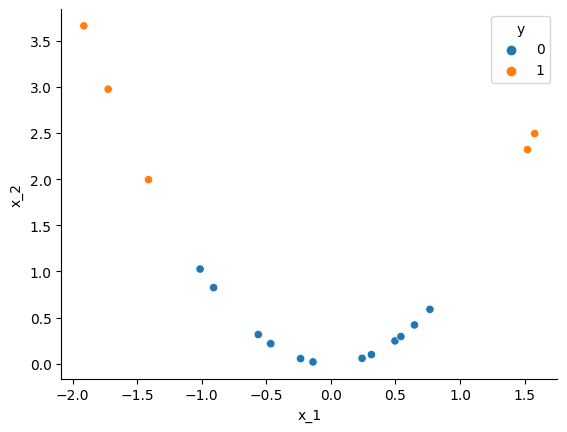

In [5]:
sns.scatterplot(data=df, x="x_1", y="x_2", hue="y")
sns.despine()
plt.show()

And of course, although we have seen a feature map of the type $\Phi : \mathbb{R}^1 \rightarrow \mathbb{R}^2$, they can take on the most different forms. In general, we can define a generic feature map as $\Phi : \mathcal{X} \rightarrow \mathcal{Z}$ (concretely, $\Phi : \mathbb{R}^m \rightarrow \mathbb{R}^n$, for $m, n$ arbitrary dimensions!)

Another example, $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^3$:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/105e0718-f938-4d09-919a-b37f79b410f7.PNG width=400>

<img src=https://i.pinimg.com/originals/bc/6b/75/bc6b756f5bf44b54f269b2c076cff162.gif width=400>

Finally, now we have all the necessary elements to understand what SVMs are:

> a **Support Vector Machine** is nothing more than **a smooth margin classifier** trained **in the feature space**. Therefore, this classifier presupposes the prior application of a **feature map** to the data in the input space.

From the discussion above, it became clear that it is precisely the feature map that gives great power to SVMs. In fact, the possibility of achieving linear separability is something formidable.

In this context, a natural question is: how to choose a good feature map? Formally, there are infinitely many possible feature maps. How to choose, among infinite options, exactly the map that guarantees linear separability in the feature space? Although this question is not easy to answer, there are some techniques to help us choose good feature maps.

Beyond that, there is a second, even bigger problem: suppose we want to introduce a kernel that takes the points to a feature space of very high dimensionality (something like $\Phi : \mathbb{R}^2 \mapsto \mathbb{R}^{10000}$). It would be expected that this is an **operationally costly** feature map to be calculated. To solve this problem, the use of **kernel functions** was introduced to capture an important aspect of feature maps.

To understand the importance of kernel functions, we need to understand one thing:

> The SVM hypothesis depends only on the **inner product** between the observations in the feature space

The hypothesis is as follows:

$$f_{H, \alpha}(\vec{x}) = \text{sign} \left ( \sum_{i=1}^N y_i \alpha_i \langle \Phi(\vec{x}) , \Phi(\vec{x}_i) \rangle + b\right ) $$

Understandig the terms:

- each $\vec{x}_i$, $i = 1, 2, \cdots, N$ is one of the $N$ **training observations**; and each $y_i$ is the respective target;
- each $\alpha_i$ is a [Lagrange multiplier](https://en.wikipedia.org/wiki/Lagrange_multiplier). We can understand them simply as **numerical coefficients associated with each training observation**, and $\alpha_i > 0$. We can understand these coefficients as substitutes for $\vec{w}$ (a [dual](https://en.wikipedia.org/wiki/Duality_(optimization)) representation of the hyperplane);
- $\langle \Phi(\vec{x}) , \Phi(\vec{x}_i) \rangle$ is the inner product between the test observation $\vec{x}$ and each training observation $\vec{x}_i$, **in the feature space**, that is, after applying the feature map!

> **Notice:** in our notation of **space z**, we could write $\Phi(\vec{x}) = \vec{z}$ and $\Phi(\vec{x}_i) = \vec{z}_i$.

Nevertheless, we will keep the explicit notation $\Phi(\vec{x})$. It doesn't seem like it, but this will actually make our notation easier.

Conclusions:

- a maximum margin classifier has high potential for generalization, for linearly separable data
- a smooth margin classifier (support vectors) introduces a little more bias by allowing training errors, but, with that, it increases the potential for generalization, and can be applicable to data that are not exactly linearly separable
- the decision boundary of a margin classifier will always be linear in the feature space
- if the data is not linearly separable in the original (input) space, we can make a feature map to take them to a feature space where there is linear separability
- the only thing that matters to the SVM is the inner product between the observations in the feature space;

## Kernel functions

A kernel function $\kappa$ is nothing more than a **measure of similarity** between two vectors $\vec{x}$ and $\vec{x}'$ (which in our case, are observations). We define it as:

$$\boxed{\begin{align*}
\kappa \ \colon \ & \mathcal{X} \times \mathcal{X} \longrightarrow \mathbb{R} \\
& (\vec{x}, \vec{x}') \longmapsto \kappa(\vec{x}, \vec{x}')
\end{align*}}$$

That is, a kernel is a function that, given two observations $\vec{x}$ and $\vec{x}'$, returns a real number that characterizes how similar the two observations are to each other.

**Fundamental point**: a kernel function allows the **inner product** between two observations to be calculated **in the feature space**, without us having to **explicitly take the observations to the feature space**. That is, we can **avoid** the feature map, which is usually computationally costly, from being explicitly applied. And once the SVM is only interested in the inner product, we can use the kernel function directly, which is much more computationally simple than the explicit feature map. This is called the **kernel trick**.

### Example of application of the kernel trick

Consider that we have $\mathcal{X} = \mathbb{R}^2$, that is, $\vec{x} = (X_1, X_2)$, an input space of two dimensions.

Then we have a feature map $\Phi : \mathbb{R}^2 \rightarrow \mathbb{R}^6$, that is, we will have $\mathcal{Z} = \mathbb{R}^6$ as the feature space. Explicitly, the application of the feature map is:

$$\Phi(\vec{x}) = \left(1, X_1^2, X_2^2, \sqrt{2}X_1, \sqrt{2}X_2, \sqrt{2}X_1 X_2 \right )$$

Therefore, taking two generic observations $\vec{x}$ and $\vec{x}'$, we have:

$$\begin{align*}
\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle &= \langle \left(1, X_1^2, X_2^2, \sqrt{2}X_1, \sqrt{2}X_2, \sqrt{2}X_1 X_2 \right ), \left(1, X'^2_1, X'^2_2, \sqrt{2}X'_1, \sqrt{2}X'_2, \sqrt{2}X'_1 X'_2 \right )\rangle =
\\
\\
&= 1 + X_1^2 X'^2_1 + X_2^2 X'^2_2 + \left ( \sqrt{2}X_1 \right) \left ( \sqrt{2}X'_1 \right) + \left ( \sqrt{2}X_2 \right )\left ( \sqrt{2}X'_2  \right )+ \left (\sqrt{2}X_1 X_2 \right )\left (\sqrt{2}X'_1 X'_2 \right )  =
\\
\\
&= 1 + X_1^2 X'^2_1 + X_2^2 X'^2_2 + 2 \left ( X_1 X'_1 + X_2 X'_2 + X_1 X'_1 X_2 X'_2 \right ) 
\end{align*}$$

Let's rearrange the terms above as follows:

$$\begin{align*}
\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle &= 1 + \left ( X_1^2 X'^2_1 + X_2^2 X'^2_2 + 2  X_1 X'_1 X_2 X'_2  \right ) + 2 \left ( X_1 X'_1 + X_2 X'_2\right ) =
\\
\\
&= 1 + \left ( X_1 X'_1 + X_2 X'_2\right )^2 + 2 \left ( X_1 X'_1 + X_2 X'_2\right ) = 
\\ 
\\
&= \Big ( 1 + \left ( X_1 X'_1 + X_2 X'_2 \right ) \Big)^2
\end{align*}$$

Now, note that: $\langle \vec{x} , \vec{x}' \rangle = \langle (X_1, X_2), (X'_1, X'_2) \rangle = X_1 X'_1 + X_2 X'_2$, exactly as it appears in the result above. Therefore, we have:

$$\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle = \left ( 1 + \langle \vec{x} , \vec{x}' \rangle \right)^2$$

That is, we have shown that it is possible to write the inner product between the vectors **in the feature space** in terms (of the inner product) of the vectors **in the input space**. Well, that's precisely the kernel:

$$ \kappa_\Phi(\vec{x}, \vec{x}') = \left ( 1 + \langle \vec{x} , \vec{x}' \rangle \right)^2 = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle$$

So, we performed the example above to prove that, indeed, using the kernel is equivalent to calculating the inner product between the observations in the feature space. That is, in fact, $\kappa_\Phi(\vec{x}, \vec{x}') = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle$.

That is why we say that the kernel allows us to **calculate the inner product between two vectors in the feature space** without explicitly "**having to visit**" the feature space. This is the efficiency gain that kernels provide.

This way, we have defined **the inner product in the feature space** as being the measures of similarity between the points in this space:

$$ \kappa_\Phi(\vec{x}, \vec{x}') = \langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle \ ,$$

And the hypothesis is rewritten as:

$$\boxed{f_{H, \alpha}(\vec{x}) = \text{sign} \left ( \sum_{i=1}^N y_i \alpha_i\kappa_\Phi(\vec{x}, \vec{x}_i) + b\right )} $$

In the same way that there are infinitely many possible feature maps, the variety of kernels is also immense. Despite kernels offering an absurd operational advantage over the explicit application of the feature map, the problem of choosing a suitable kernel for a given problem still exists. In practice, there are some ways to propose kernels, but this is not an easy topic. There is a whole set of methods and techniques that use kernels for learning tasks, the so-called [kernel methods](https://en.wikipedia.org/wiki/Kernel_method).

Despite the enormous freedom in the design of kernels, there are some particular classes of kernels that are commonly used:

- Linear kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \langle \vec{x}, \vec{x}'\rangle $

- Polynomial kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = (\gamma \langle \vec{x}, \vec{x}'\rangle + r)^d$

- Radial Basis Function (RBF) kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \exp(-\gamma \|\vec{x}-\vec{x}'\|^2)$

- Sigmoid kernel: $\kappa_\Phi(\vec{x}, \vec{x}') = \tanh(\gamma \langle \vec{x},\vec{x}'\rangle + r)$

> In the explicit example we did above, we used a polynomial kernel with $r=\gamma=1$ and $d=2$!

Note that the functional dependence of the kernels changes, depending exactly on the specific feature map they represent. However, in all cases, the features in the input space are used, which guarantees efficiency.

## SVM for classification

To build an SVM model, it is very important that the data is normalized.

The reason is very simple: as we saw above, the SVM is completely based on the kernel, which in turn is given by an inner product. The inner product, on the other hand, is highly dependent on the **scale of the features** (remember, $\langle \Phi(\vec{x}) , \Phi(\vec{x}') \rangle = \left | \Phi(\vec{x}) \right | \left | \Phi(\vec{x}') \right | \cos \left ({\theta_{\vec{x}, \vec{x}'}} \right )$, that is, the norm of the vectors influences the inner product). Therefore, to avoid that scale effects influence the classification, normalization is an extremely important step.

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [7]:
def pipe_pre_process():
    
    df = pd.read_csv("../data/german-credit-data.csv", index_col=0)

    X = df.drop(columns="Risk")
    y = df["Risk"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                  ("onehot", OneHotEncoder())])

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processor = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processor

In [8]:
def classification_metrics(X_train, X_test, y_train, y_test, estimator):
    
    # ============================================

    print("\nTrain evaluation metrics:")

    y_pred_train = estimator.predict(X_train)
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    print(classification_report(y_train, y_pred_train))

    # ============================================

    print("\nTest evaluation metrics:")

    y_pred_test = estimator.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    print(classification_report(y_test, y_pred_test))

Now, let's instantiate the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class.

Notice that there are many hyperparameters. It is worth studying a little more about the functioning of each one, and its influence. For some practical tips on using SVMs with SKLearn, [click here](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use).

In practice, the main hyperparameters will be `C` and `gamma` (if the chosen kernel uses this parameter, such as the rbf kernel: that is why the `kernel` hyperparameter is also important):

- `C`: is a regularization parameter, related to the "smoothness" of the margin. It controls the tradeoff between the complexity of the decision boundary and classification errors that are allowed. The **lower** the C, the smoother the decision boundary will be, as more classification errors are allowed (that is, the margin becomes **wider**); the **higher** C, the tolerance to classification errors is lower (and the margin becomes less smooth, more complex)

<img src="https://learnopencv.com/wp-content/uploads/2018/07/svm-parameter-c-example.png" width=500>

- `gamma`: defines the influence that each point has on the decision boundary. It is the "opening" of the kernel: the **higher** the gamma, the shorter is the range of the influence, and vice versa

<img src="https://sgao323.gitbooks.io/artificial-intelligence-projects/content/assets/svm_gamma.png" width=400>

- `kernel`: available options are `linear`, `poly`, `rbf` and `sigmoid`, which we presented above. It is also possible to use a pre-calculated custom kernel (in this case, we use the `precomputed` option).

About `C` and `gamma`, it is important that adequate values are found using Grid/Random search, using **exponentially spaced values**.

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test, pre_processor = pipe_pre_process()

pipe_svc = Pipeline([("pre_process", pre_processor),
                     ("svc", SVC(random_state=42))])

pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'Housing',
                                                   'Saving accounts',
                                                   'Checking account',
                                                   'Purpose'])])),
                ('svc', SVC(random_state=42))])


Train evaluation metrics:


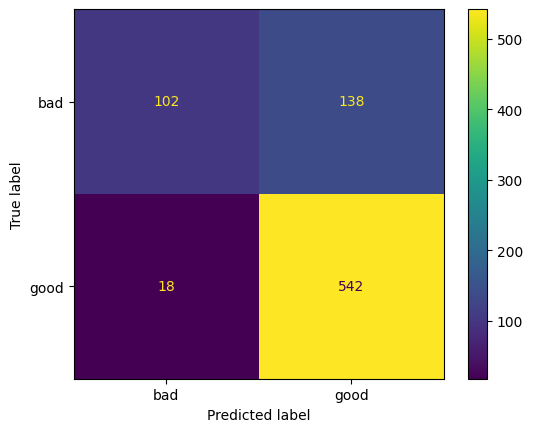

              precision    recall  f1-score   support

         bad       0.85      0.42      0.57       240
        good       0.80      0.97      0.87       560

    accuracy                           0.81       800
   macro avg       0.82      0.70      0.72       800
weighted avg       0.81      0.81      0.78       800


Test evaluation metrics:


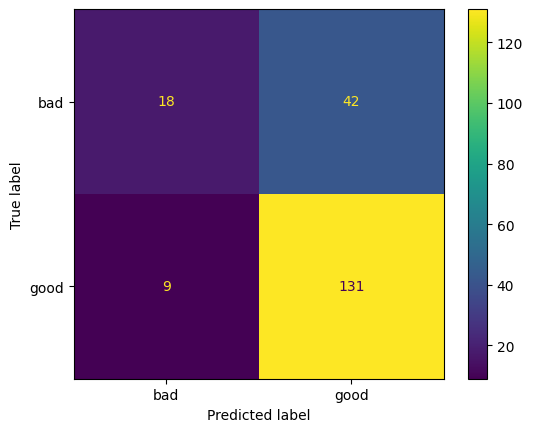

              precision    recall  f1-score   support

         bad       0.67      0.30      0.41        60
        good       0.76      0.94      0.84       140

    accuracy                           0.74       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.73      0.74      0.71       200



In [10]:
classification_metrics(X_train, X_test, y_train, y_test, pipe_svc)

Use gridsearch to optimize the model:

In [11]:
X_train, X_test, y_train, y_test, pre_processor = pipe_pre_process()

pipe_svc = Pipeline([("pre_process", pre_processor),
                     ("svc", SVC(random_state=42))])

# ===========================================

param_grid_svc = {"svc__kernel" : ["rbf", "poly"],
                  "svc__C" : np.logspace(-2, 2, 5),
                  "svc__gamma" : np.logspace(-2, 2, 5)}

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_svc = GridSearchCV(estimator=pipe_svc,
                       param_grid=param_grid_svc,
                       scoring="f1_weighted",
                       cv=splitter,
                       n_jobs=-1)

grid_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat',
                                                                         Pipeline(steps=[('input_cat',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'Housing',
                                                                          'Saving '
                                                                          'accounts',
                                                                          'Checking '
                                                                          'account',
                                                                          'Purpose'])])),
                                       ('svc', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__kernel': ['rbf', 'poly']},
             scoring='f1_weighted')

In [12]:
grid_svc.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


Train evaluation metrics:


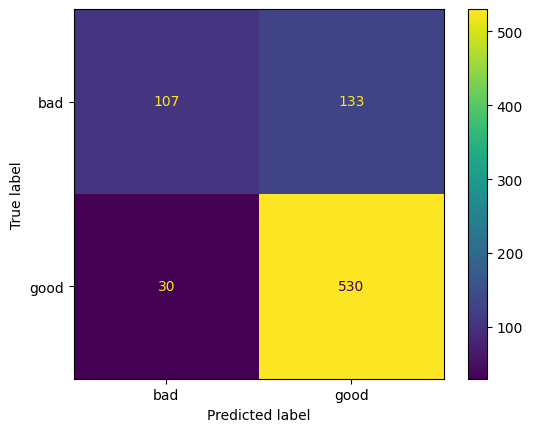

              precision    recall  f1-score   support

         bad       0.78      0.45      0.57       240
        good       0.80      0.95      0.87       560

    accuracy                           0.80       800
   macro avg       0.79      0.70      0.72       800
weighted avg       0.79      0.80      0.78       800


Test evaluation metrics:


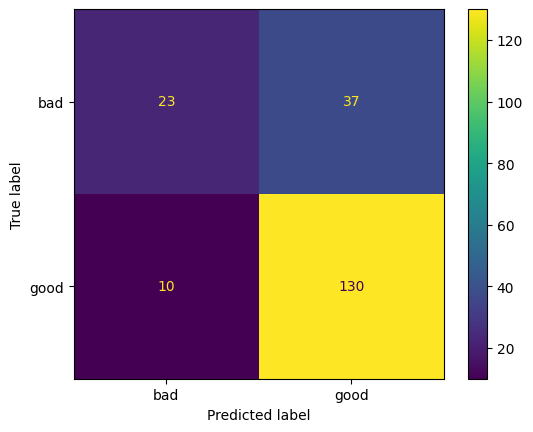

              precision    recall  f1-score   support

         bad       0.70      0.38      0.49        60
        good       0.78      0.93      0.85       140

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.67       200
weighted avg       0.75      0.77      0.74       200



In [13]:
classification_metrics(X_train, X_test, y_train, y_test, grid_svc)

## SVM for regression

Even though we presented SVM as a classifier, it is also possible to use this method for regression. All elements of the SVM classifier (margin, kernel, etc.) are also relevant here.

The idea is very simple: use a kernel so that a **linear regression model is trained in the feature space**. In the input space, this model is reflected as a non-linear regression (in the same way that, in the case of classification, linear decision boundaries in the feature space are reflected as non-linear boundaries in the input space).

The main difference is that the concept of margin is also present, so that **only some points will effectively contribute to the regression**. In this case, they are the points **within the margin** (region known as $\epsilon-$tube) that will be these support vectors. That is, points that are outside the margin do not contribute to the cost function.

<img src=https://www.saedsayad.com/images/SVR_5.png width=600>

A comparison between SVM classifiers and regressors:

<img src=https://miro.medium.com/max/1100/1*XE9jt0r1yAW8LnliQ3mllQ.png width=600>

In [14]:
def pipe_pre_process():

    df = pd.read_csv("../data/house-prices.csv")

    X = df.drop(columns=["SalePrice", "Id"])
    y = df["SalePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                  # agora, com o handle_unknown, pra evitar o errro de categoria nova no teste
                                  ("onehot", OneHotEncoder(handle_unknown="ignore"))])

    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processor = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processor

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def regression_metrics(X_train, X_test, y_train, y_test, estimator):
    
    y_pred_train = estimator.predict(X_train)

    print("\nTrain evaluation metrics:")
    print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

    y_pred_test = estimator.predict(X_test)

    print("\nTest evaluation metrics:")
    print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 

In [16]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test, pre_processador = pipe_pre_process()

pipe_svr = Pipeline([("pre_process", pre_processador),
                     ("svr", SVR())])

pipe_svr.fit(X_train, y_train)

regression_metrics(X_train, X_test, y_train, y_test, pipe_svr)


Train evaluation metrics:
R^2: -0.04
MAE: 54502.05
RMSE: 78921.69

Test evaluation metrics:
R^2: -0.02
MAE: 59515.82
RMSE: 88626.08
